# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要理解的关于这些战斗的问题，例如，哪一个区域发生了最多的战争？哪一个国王获得了最多的胜利？战争的胜利与否受那些关键因素的影响？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：

1. 战争的总体胜负是什么样的？
2. 各种类别战争发生的次数？
3. 有重要人物死亡或被捕的战争次数是多少？
4. 哪一年发生了最多的战争？
5. 哪个地域发生了最多的战争？
6. 战争的类别与战争胜负是否具有相关关系？
7. 有没有以少胜多，以弱胜强的战争？
8. 战争发生在夏天是否意味着攻击者胜算更大？


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。

## 数据评估和清理

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

In [1]:
# TO DO: load pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
% matplotlib inline

In [2]:
# TO DO: load the dataset
battle_data = pd.read_csv('./battles.csv')

In [3]:
# TO DO: check the dataset general info
battle_data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
print('dataset has {} rows and {} columns'.format(*battle_data.shape))
battle_data.dtypes

dataset has 38 rows and 25 columns


name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                float64
location               object
region                 object
note                   object
dtype: object

In [5]:
battle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [6]:
battle_data.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [7]:
battle_data.duplicated().sum()

0

通过上面的分析，未发现任何明显的异常值，数据也没有出现冗余列，主要问题还是集中在缺失值上面。粗略浏览了一下数据集中前几条数据，发现缺失值的情况比较普遍，下面先检查一下数据集的缺失值情况。

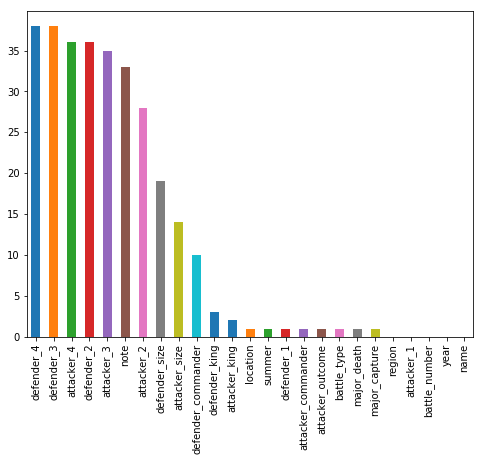

In [8]:
battle_data.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(8, 6));

1. 总的数据只有38条，defender2-4，attacker2-4和note的缺失值超过了半数，因此这些字段对分析起不了什么作用，应该删掉
2. defender_size和attacker_size也出现了缺失值，这些缺失值对分析战争的规模以及力量对比会产生影响，本来数据集规模就不大，直接删掉就不剩多少了，因此这里需要进行填充；
3. attacker_commander和defender_commander对后续分析无影响，可以删掉；
4. 为避免对分析结果造成影响，缺失值数量在5以内的，可以考虑直接删掉；

In [9]:
# TO DO: clean the data (optional: only there are problems)
cols_to_drop = ['attacker_2', 'attacker_3', 'attacker_4', 'defender_2', 'defender_3', 'defender_4', 'note']
battle_data_cleaned = battle_data.drop(cols_to_drop, axis=1)
battle_data_cleaned['defender_size'] = battle_data_cleaned['defender_size'].fillna(0)
battle_data_cleaned['attacker_size'] = battle_data_cleaned['attacker_size'].fillna(0)
battle_data_cleaned = battle_data_cleaned.drop(['attacker_commander', 'defender_commander'], axis=1)
battle_data_cleaned.dropna(inplace=True)

为了方便后面的分析，我们还要创建一些新特征：
1. major_loss：表示战争中有重要人物死亡或被捕；
2. relative_force：攻击方力量大小大于防守方力量大小，布尔值；

In [10]:
battle_data_cleaned['major_loss'] = battle_data_cleaned['major_death'] + battle_data_cleaned['major_capture']
battle_data_cleaned['relative_force'] = battle_data_cleaned['attacker_size'] > battle_data_cleaned['defender_size']
battle_data_cleaned.isnull().sum()

name                0
year                0
battle_number       0
attacker_king       0
defender_king       0
attacker_1          0
defender_1          0
attacker_outcome    0
battle_type         0
major_death         0
major_capture       0
attacker_size       0
defender_size       0
summer              0
location            0
region              0
major_loss          0
relative_force      0
dtype: int64

In [11]:
print('data has {} rows and {} columns aftered cleaned'.format(*battle_data_cleaned.shape))

data has 33 rows and 18 columns aftered cleaned


## 数据探索分析

在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

### 1. 战争的总体胜负是什么样的？

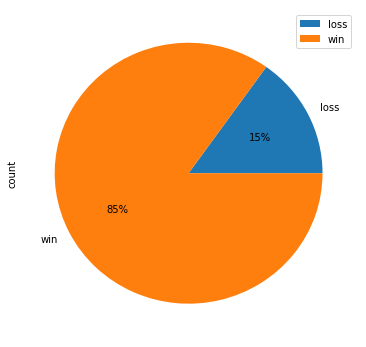

In [12]:
# In exploratory data analysis, please make sure of using statistics and visualizations
battle_data_cleaned.groupby(['attacker_outcome']).agg(['count'])['battle_number'].plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(6, 6));

### 2. 各种类别战争发生的次数？

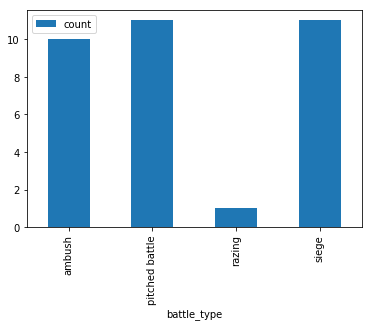

In [13]:
battle_data_cleaned.groupby(['battle_type']).agg(['count'])['battle_number'].plot(kind='bar')

### 3. 有重要人物死亡或被捕的战争次数是多少？

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ad6289080>],
      dtype=object)

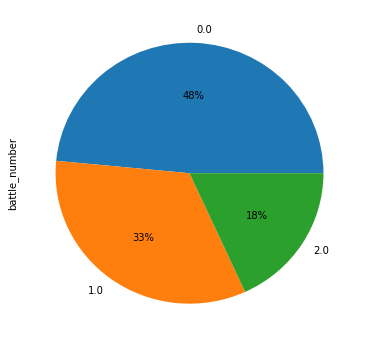

In [14]:
battle_data_cleaned.groupby(['major_loss']).count()['battle_number'].plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(6, 6))

### 4. 哪一年发生了最多的战争？

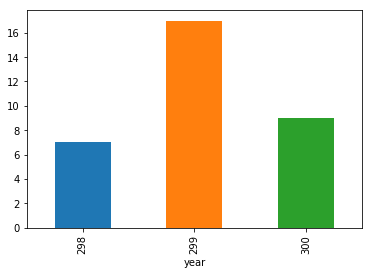

In [15]:
battle_data_cleaned.groupby(['year']).count()['battle_number'].plot(kind='bar')

### 5. 哪个地域发生了最多的战争？

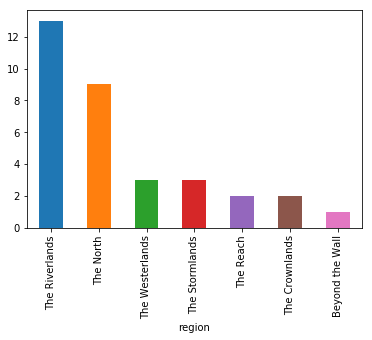

In [16]:
battle_data_cleaned.groupby(['region']).count()['battle_number'].sort_values(ascending=False).plot(kind='bar')

### 6. 战争的类别与战争胜负是否具有相关关系？

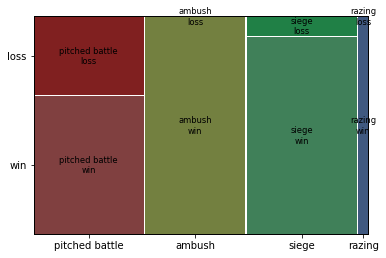

In [17]:
mosaic(battle_data_cleaned, ['battle_type', 'attacker_outcome']);

### 7. 有没有以少胜多，以弱胜强的战争？

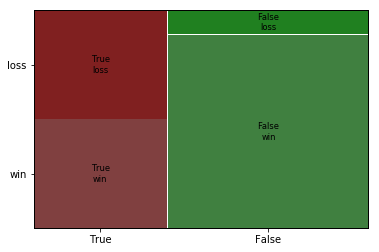

In [18]:
available_attacker = battle_data_cleaned['attacker_size'] > 0
available_defender = battle_data_cleaned['defender_size'] > 0
mosaic(battle_data_cleaned[available_attacker & available_defender], ['relative_force', 'attacker_outcome']);

### 8. 战争发生在夏天是否意味着攻击者胜算更大？

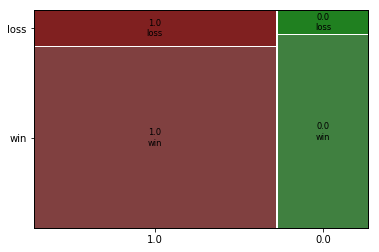

In [19]:
mosaic(battle_data_cleaned, ['summer', 'attacker_outcome']);

## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：

1. 战争总体上还是赢的多，赢的占85%，输的占15%；
2. 各种类别战争中，遭遇战和阵地战发生的次数最多，以隐身或诡计为主要攻击手段的战争其次，最少的是对未设防位置发起攻击的战争；
3. 没有重要人物死亡或被捕的战争占48%，将近一半，同时有重要人物死亡或被捕的战争占33%，剩下18%的战争要么有重要人物死亡要么有重要人物被捕，但不会同时出现；
4. 299年发生了最多的战争；
5. The Riverlands发生了最多的战争；
6. 战争的类别与战争胜负具有相关关系，ambush，siege和razing类型的战争胜率很高；
7. 有以少胜多，以弱胜强的战争，攻击方力量落后于防守方时，大多数情况下都能胜利；
8. 战争发生在夏天并不意味着攻击者胜算更大，其他季节的胜算甚至更高；

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：

1. 数据集存在一些缺失值，并没有包含所有想要分析的数据，有些数据的缺失值太多，只能忍痛放弃；
2. 我对缺失值的操作有可能会影响结论，特别是对于attacker_size和defender_size这样的变量，对分析敌我双方力量对比相关的问题会产生影响，但我在做可视化的时候都注意只分析有效数据；
3. 有其他变量对我的分析有帮助，所以我自己根据已有数据创造了两个新的特征：major_loss和relative_force；
4. 我注意没有混淆相关性和因果性，我对几个分类变量之间进行了相关性分析（用mosaic图），找到了一些相关关系，但不代表它们之间一定有因果关系；

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。

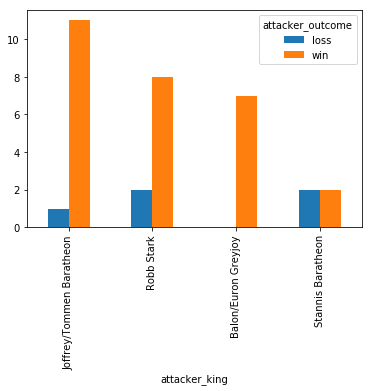

In [20]:
battle_data_cleaned.groupby(['attacker_king']).attacker_outcome.value_counts().unstack().sort_values(by='win', ascending=False).plot(kind='bar');